# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [31]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# from keras.datasets import cifar10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# # y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# # it's a good idea to flatten the array.
# y_train = y_train.reshape(-1)
# y_test = y_test.reshape(-1)

# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)

is_features_normal = False

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [32]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [33]:
import csv

with open('signnames.csv') as f:
    reader = csv.DictReader(f)
    signs = {}
    for row in reader:
        index = int(row['ClassId'])
        print("{0:<5}".format(index),
            '{0:<100}'.format(row['SignName'], row['ClassId']))
        signs[int(row['ClassId'])] = row['SignName']

0     Speed limit (20km/h)                                                                                
1     Speed limit (30km/h)                                                                                
2     Speed limit (50km/h)                                                                                
3     Speed limit (60km/h)                                                                                
4     Speed limit (70km/h)                                                                                
5     Speed limit (80km/h)                                                                                
6     End of speed limit (80km/h)                                                                         
7     Speed limit (100km/h)                                                                               
8     Speed limit (120km/h)                                                                               
9     No passing                     

In [34]:
import math
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

def process_image_plot(item, ax, mplot):
    """plot an image using the given axis and plot reference
    
    Args:
        item -- item holding image data to be ploted
        ax -- axis reference that can be used to modify the plot
        mplot -- reference to matplotlib that can be used to plot the image
    """    
    ax.set_xticks([]) # remove horizontal ticks from image
    ax.set_yticks([]) # remove vertical ticks from image
    mplot.imshow(item[0], cmap=item[1]) # display image with specified cmap

def tile_images(images, col_num):
    """Plot multiple images in a single image
    
    Args:
        images -- array of images to plot
        col_num -- number of required columns in the plot
    """
    # determine image size to calculate desired figure height
    shape = images[0][0].shape
    img_height = float(shape[0])
    img_width = float(shape[1])
    tile_plots(images, col_num, img_width, img_height, process_image_plot)

def tile_plots(items, col_num, item_width, item_height, processor):
    """Plot multiple items in a single image, each item is processed using the 
    given processor function. The processor function takes as arguments 
    an item, axis and plot reference. It's up to the processor to define how to
    use the axis and plot object to plot the item.
    
    Args:
        items -- array of objects to be processed and ploted in each cell of the figure
        col_num -- number of required columns in the plot
        item_width -- original width of the item, used to retain aspect ratio
        item_height -- original width of the item, used to retain aspect ratio
        processor -- function which takes an item, axis and plot reference and uses
            the axis and plot reference to plot the item
    """
    if len(items) == 0:
        return
    notebook_pixel_width = 720.0
    col_width = notebook_pixel_width / float(col_num)
    row_height = (col_width / item_width) * item_height
    # divide images by required columns to determine number of rows
    row_num = math.ceil(len(items)/col_num)
    fig = plt.figure()
    # figure size is specified in inches, so divide required pixel size by dots per inch
    dpi = fig.get_dpi()
    fig.set_size_inches(notebook_pixel_width/float(dpi), (row_num*row_height)/float(dpi))
    # create a grid layout to position the individual plots
    gridspec.GridSpec(row_num ,col_num)
    for i, item in enumerate(items):
        row = i // col_num # integer floor divide to increment row after all columns
        col = i % col_num # increment col from 0 to cols-1 and cycle back to 0
        ax = plt.subplot2grid((row_num, col_num), (row, col)) # create plot in correct grid cell
        processor(item, ax, plt)
        plt.tight_layout() # remove margins from figure
        
    plt.show()

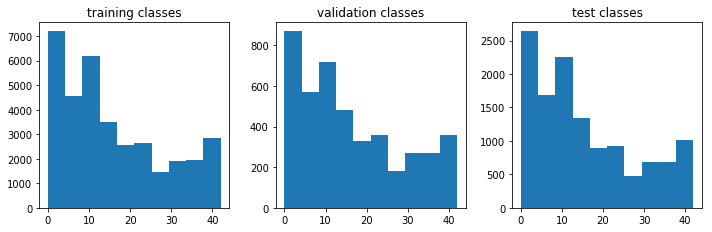

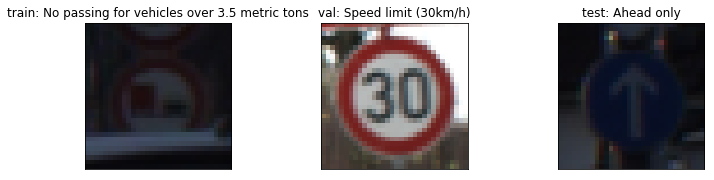

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [35]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def histogram(item, ax, plt):
    plt.hist(item[1])
    ax.set_title(item[0])
    
def show_image(item, ax, plt):
    ax.set_xticks([]) # remove horizontal ticks from image
    ax.set_yticks([]) # remove vertical ticks from image
    plt.imshow(item[1])
    ax.set_title(item[0])
    
def show_gray_image(item, ax, plt):
    ax.set_xticks([]) # remove horizontal ticks from image
    ax.set_yticks([]) # remove vertical ticks from image
    plt.imshow(item[1].squeeze(), cmap='gray')
    ax.set_title(item[0])

tile_plots(
    [('training classes', y_train), 
     ('validation classes', y_valid), 
     ('test classes', y_test)], 
    3, 300, 300, histogram
)

r_train = random.randint(0,len(X_train))
r_valid = random.randint(0,len(X_valid))
r_test = random.randint(0,len(X_test))
tile_plots(
    [('train: {0}'.format(signs[y_train[r_train]]), X_train[r_train]), 
     ('val: {0}'.format(signs[y_valid[r_valid]]), X_valid[r_valid]), 
     ('test: {0}'.format(signs[y_test[r_test]]), X_test[r_test])], 
    3, 32, 32, show_image
)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [36]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

################ TODO ##################
### Create more test data by applying transformations to provided examples
### Keep in mind that certain rotation transforms will actually turn one sign
### into another. Use additional annotation to avoid altering such signs but also
### check that such selective input multiplication doesn't change the overall 
### data label distribution too much

In [37]:
import tensorflow as tf

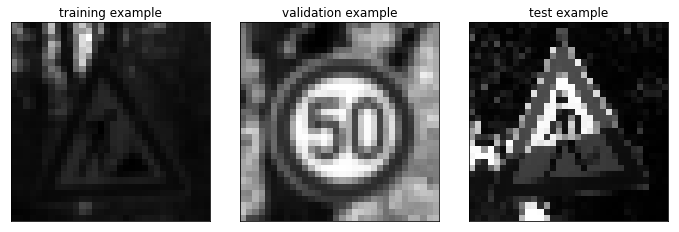

In [38]:
import cv2

def rgb2gray(rgb):
    """
    Convert RGB to Grayscale
    """
    return np.mean(rgb, axis=-1, keepdims=True)

def rgb2yuv(rgb):
    """
    Convert to YUV then just return the 'Y'
    """
    # use a conversion that highlights human priority of color
    
    img = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    img = np.sum(rgb, axis=-1, keepdims=True)
    return img
    
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    image_data = image_data.astype(float)
    image_data = rgb2yuv(image_data)
    return z_score_norm(image_data)

def min_max_norm(image_data):
    a = 0.1
    b = 0.9
    min = np.min(image_data)
    max = np.max(image_data)
    
    return a + (( (image_data - min) * (b - a)) / (max - min) )

def z_score_norm(image_data):
    image_data -= np.mean(image_data)
    image_data /= np.std(image_data)
    return image_data

if not is_features_normal:
    X_train = normalize(X_train)
    X_valid = normalize(X_valid)
    X_test = normalize(X_test)
    is_features_normal = True
    
r_train = random.randint(0,len(X_train))
r_valid = random.randint(0,len(X_valid))
r_test = random.randint(0,len(X_test))
tile_plots(
    [('training example', X_train[r_train]), 
     ('validation example', X_valid[r_valid]), 
     ('test example', X_test[r_test])], 
    3, 32, 32, show_gray_image
)

max: 2.6105581603373973 min: -1.1969575344087542
max: 1.0 min: 0.0


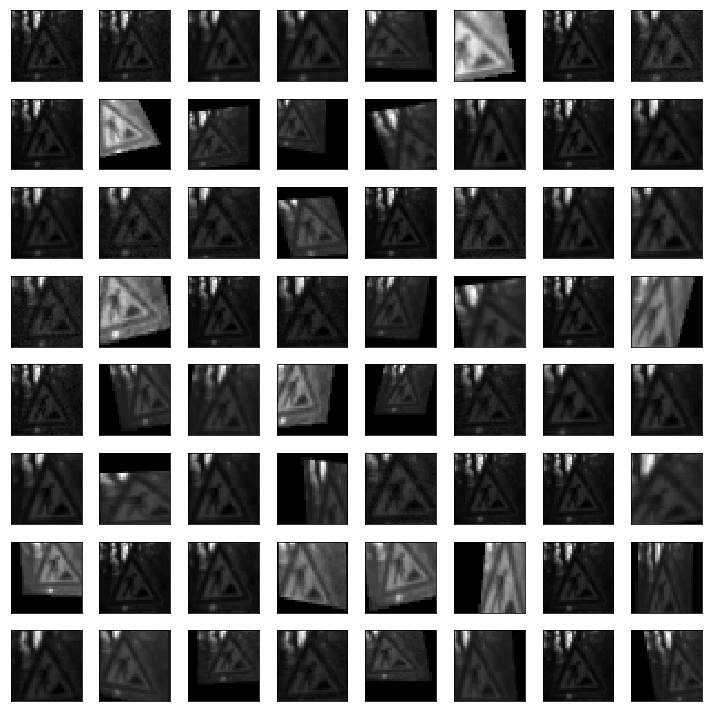

In [40]:
from imgaug import augmenters as iaa

sometimes = lambda aug: iaa.Sometimes(0.5, aug)

seq = iaa.Sequential(
    [
        # crop images from each side by 0 to 4px (randomly chosen)
        sometimes(iaa.Crop(px=(0, 6))), 
#         # blur images with a sigma between 0 and 3.0
        sometimes(iaa.GaussianBlur(0, 2.0)),
#         # add gaussian noise to images
        sometimes(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.01*255), per_channel=0.5)), 
        sometimes(iaa.Affine(
            # scale images to 90-110% of their size, individually per axis
            scale={"x": (0.7, 1.3), "y": (0.7, 1.3)}, 
            # translate by -10 to +10 percent (per axis)
            translate_percent={"x": (-0.3, 0.3), "y": (-0.3, 0.3)}, 
            # rotate by -10 to +10 degrees
            rotate=(-15, 15), 
            # shear by -10 to +10 degrees
            shear=(-15, 15) 
        ))
    ]
)

# Plot 8*8 augmented versions of first image above
# NOTE: The augmentation library expects images to be uint8 but we have already normalized to floats
# As below, during training the images need to be scaled to unit8 for augmentation, then the result
# scaled back to 0..1 floats to keep the values small and make the optimizers job easier
print ('max: {} min: {}'.format(np.max(X_train),np.min(X_train)))
foo = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
print ('max: {} min: {}'.format(np.max(foo),np.min(foo)))
augmented_examples = []
for i in range(64):
    image = seq.augment_image((foo[r_train] * 255.0).astype(np.uint8))
    augmented_examples.append(('', image.astype(np.float) / 255.0))
    
tile_plots(augmented_examples, 8, 32, 32, show_gray_image)

### Model Architecture

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)
l2_loss_penalty = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [11]:
############### TODO ###############

# Complete Write-up
# Complete optional visualization section



# Experiment with learning color mapping



# Try some other tactics like confusion matrix visualization and other image pre-processing steps



# Try to visualize improvement in training and validation error / loss



# Run on GCP



# Map data into TF-Slim format and try Inception network with transfer learning.



# "" Resnet



# "" VGG



# "" FCN


### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

EPOCHS = 250
BATCH_SIZE = 128

# mean for the normal distribution sampled for the initial weights
mu = 0
# variance for the normal distribution sampled for the initial weights
sigma = 0.1
# learning rate
rate = 0.001

def model(x):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input = 32x32x32. Output = 32x32x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 32x32x32. Output = 16x16x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # # Dropout to avoid overfitting
    conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)
    
    # Getting 96.7% with conv3 => flatten
    
    

    # Layer 3: Convolutional. Input = 16x16x32 Output = 16x16x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Layer 4: Convolutional. Input = 16x16x64 Output = 16x16x64.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b

    # Activation.
    conv4 = tf.nn.relu(conv4)

    # Pooling. Input = 16x16x64. Output = 8x8x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # # Dropout to avoid overfitting
    conv4 = tf.nn.dropout(conv4, keep_prob=keep_prob_2)
    
    
    # Getting 97.6% with conv4 => flatten
    
    
    
    # Layer 5: Convolutional. Input = 8x8x64 Output = 8x8x128.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b

    # Activation.
    conv5 = tf.nn.relu(conv5)
    
    # Layer 6: Convolutional. Input = 8x8x128 Output = 8x8x128.
    conv6_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 128), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b

    # Activation.
    conv6 = tf.nn.relu(conv6)
    
#     # Layer 7: Convolutional. Input = 8x8x128 Output = 8x8x128.
#     conv7_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 128), mean = mu, stddev = sigma))
#     conv7_b = tf.Variable(tf.zeros(128))
#     conv7   = tf.nn.conv2d(conv6, conv7_W, strides=[1, 1, 1, 1], padding='SAME') + conv7_b

#     # Activation.
#     conv7 = tf.nn.relu(conv7)

    # Pooling. Input = 8x8x128. Output = 4x4x128.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # # Dropout to avoid overfitting
    conv6 = tf.nn.dropout(conv6, keep_prob=keep_prob_2)
    
    # Getting 97.7% with conv6 => flatten and EPOCH 100
    # Getting 98.1% with conv6 => flatten and EPOCH 200
    
    
    
    # Flatten. Input = 16x16x32. Output = 8192.
    flat0   = flatten(conv2)
    
    # Flatten. Input = 8x8x64. Output = 4096.
    flat1   = flatten(conv4)
    
    # Flatten. Input = 4x4x128. Output = 2048.
    flat2   = flatten(conv6)
    
    # Merge flat layers. Input = 8192, 4096, 2048. Output = 14336.
    fc_all = tf.concat([flat0, flat1, flat2], 1)
    
    
    

    # Layer 7: Fully Connected. Input = 14336. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(14336, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc_all, fc1_W) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # # Dropout to avoid overfitting
#     fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob_2)  #Worse: 98.1 down to 97%

    # Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(1024))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)
    
#     # Dropout to avoid overfitting
#     fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob_2)

    # Layer 5: Fully Connected. Input = 392. Output = n_classes.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(1024, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b 

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss = tf.reduce_mean(cross_entropy)

    # Regularization term, take the L2 loss of each of the weight tensors, 
    # in this example, 2 convolutional layers and three fully connected layers. 
    # Sum them and multiply by a hyper-parameter controlling the amount of L2 loss
    regularizers = (tf.nn.l2_loss(conv1_W) + 
                                           tf.nn.l2_loss(conv2_W) +
                                           tf.nn.l2_loss(conv3_W) +
                                           tf.nn.l2_loss(conv4_W) +
                                           tf.nn.l2_loss(conv5_W) +
#                                            tf.nn.l2_loss(conv6_W) +
                                           tf.nn.l2_loss(fc1_W) +
                                           tf.nn.l2_loss(fc2_W) +
                                           tf.nn.l2_loss(fc3_W))
    l2_loss = tf.reduce_mean(loss + l2_loss_penalty * regularizers)

    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(l2_loss)
    
    return training_operation, logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# probability that drop out layer after the first convolution keeps a feature
train_keep_prob = 0.5
# probability that drop out layer after the second convolution keeps a feature
train_keep_prob_2 = 0.65
# l2 loss penalty
train_l2_loss_penalty = 0.0003

training_operation, logits = model(x)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={
            x: batch_x, 
            y: batch_y, 
            keep_prob: 1.0, 
            keep_prob_2: 1.0, 
            l2_loss_penalty: 0.0
        })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
x_train_min = np.min(X_train)
x_train_max = np.max(X_train)

with tf.Session() as sess:
    with tf.device('/gpu:0'):
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                batch_x_aug = (batch_x - x_train_min) / (x_train_max - x_train_min)
                batch_x_aug = seq.augment_images((batch_x_aug* 255.0).astype(np.uint8))
                batch_x_aug = batch_x_aug.astype(np.float) / 255.0
                batch_x_aug = (batch_x_aug * (x_train_max - x_train_min)) + x_train_min
                # 95.5% accuracy without augmentation, 98% with

    #             plot_batch = [('test',x) for x in batch_x_aug]

    #             tile_plots(plot_batch, 12, 32, 32, show_gray_image)
    #             breaks
                sess.run(training_operation, feed_dict={
                    x: batch_x_aug, 
                    y: batch_y, 
                    keep_prob: train_keep_prob, 
                    keep_prob_2: train_keep_prob_2, 
                    l2_loss_penalty: train_l2_loss_penalty
                })

            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_train, y_train)
            print("EPOCH {} ...".format(i+1))
            print("Training = {:.3f}, Validation = {:.3f}".format(training_accuracy, validation_accuracy))
            print()
    #         break

        saver.save(sess, './data/traffic')
        print("Model saved")

Training...

EPOCH 1 ...
Training = 0.125, Validation = 0.087

EPOCH 2 ...
Training = 0.350, Validation = 0.233

EPOCH 3 ...
Training = 0.646, Validation = 0.444

EPOCH 4 ...
Training = 0.807, Validation = 0.595

EPOCH 5 ...
Training = 0.892, Validation = 0.717

EPOCH 6 ...
Training = 0.927, Validation = 0.768

EPOCH 7 ...
Training = 0.941, Validation = 0.771

EPOCH 8 ...
Training = 0.961, Validation = 0.845

EPOCH 9 ...
Training = 0.965, Validation = 0.841

EPOCH 10 ...
Training = 0.981, Validation = 0.885

EPOCH 11 ...
Training = 0.978, Validation = 0.870

EPOCH 12 ...
Training = 0.985, Validation = 0.903

EPOCH 13 ...
Training = 0.989, Validation = 0.901

EPOCH 14 ...
Training = 0.988, Validation = 0.913

EPOCH 15 ...
Training = 0.990, Validation = 0.920

EPOCH 16 ...
Training = 0.992, Validation = 0.920

EPOCH 17 ...
Training = 0.990, Validation = 0.917

EPOCH 18 ...
Training = 0.994, Validation = 0.933

EPOCH 19 ...
Training = 0.995, Validation = 0.945

EPOCH 20 ...
Training = 0.9

In [41]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./data'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./data/traffic
Test Accuracy = 0.980


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

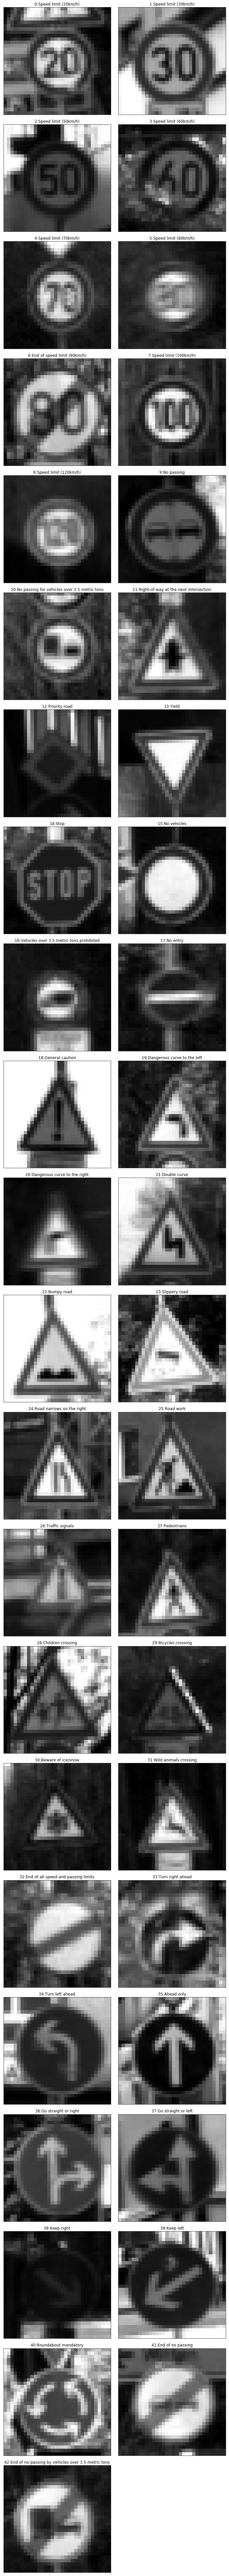

In [54]:
# Plot one image for each class ID to identify the correct labelling for the images
# downloaded from the web
class_id = 0
sign_samples = []
for i in range(len(y_train)):
    if y_train[i] == class_id:
        sign_samples.append(('{0}:{1}'.format(y_train[i],signs[y_train[i]]), X_train[i]))
        class_id += 1
        
tile_plots(sign_samples, 2, 32, 32, show_gray_image)   

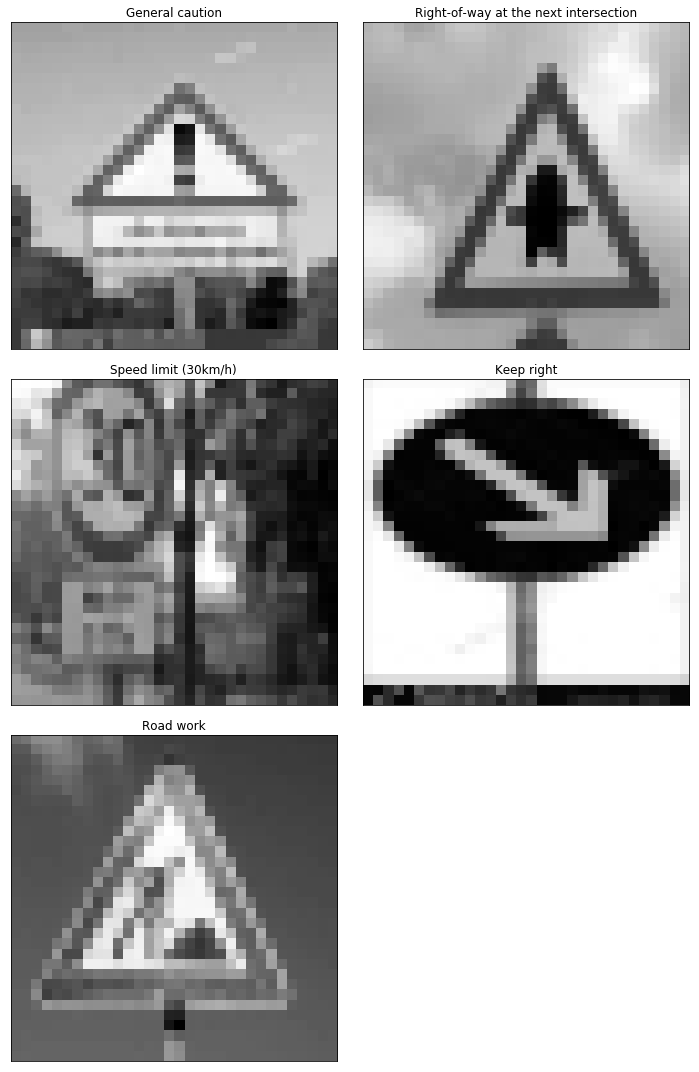

In [65]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
X_web_test = np.empty([5,32,32,3], dtype=np.uint8) 

def process_file(file):
    read_file = cv2.imread(file)
    if (read_file) is not None:
        return cv2.resize(cv2.cvtColor(read_file, cv2.COLOR_BGR2RGB),(32,32),interpolation=cv2.INTER_AREA)
    
test_files=["signs_from_web/sign_1.jpg", 
            "signs_from_web/sign_2.jpg", 
            "signs_from_web/sign_3.jpg", 
            "signs_from_web/sign_4.jpg", 
            "signs_from_web/sign_5.jpg"]

for i, file in enumerate(test_files):
    X_web_test[i] = process_file(file)

X_web_test = normalize(X_web_test)
y_web_test = [18,11,1,38,25] # determined from matching images to sample set above

web_test = []
for i in range(len(X_web_test)):
    web_test.append((signs[y_web_test[i]], X_web_test[i].astype(np.float) / 255.0))
    
tile_plots(web_test, 2, 32, 32, show_gray_image)

### Predict the Sign Type for Each Image

In [74]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax,k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./data'))
    out = sess.run(top_k, feed_dict={
            x: X_web_test, 
            keep_prob: 1.0, 
            keep_prob_2: 1.0, 
            l2_loss_penalty: 0.0
        })
    print("        Prediction                                     Actual")
    print("Sign 1:","{:<40}".format(signs[out[1][0][0]]),"{:<5}".format(""), signs[y_web_test[0]])
    print("Sign 2:","{:<40}".format(signs[out[1][1][0]]),"{:<5}".format(""), signs[y_web_test[1]])
    print("Sign 3:","{:<40}".format(signs[out[1][2][0]]),"{:<5}".format(""), signs[y_web_test[2]])
    print("Sign 4:","{:<40}".format(signs[out[1][3][0]]),"{:<5}".format(""), signs[y_web_test[3]])
    print("Sign 5:","{:<40}".format(signs[out[1][4][0]]),"{:<5}".format(""), signs[y_web_test[4]])

INFO:tensorflow:Restoring parameters from ./data/traffic
        Prediction                                     Actual
Sign 1: General caution                                General caution
Sign 2: Right-of-way at the next intersection          Right-of-way at the next intersection
Sign 3: Speed limit (70km/h)                           Speed limit (30km/h)
Sign 4: Keep right                                     Keep right
Sign 5: Road work                                      Road work


### Analyze Performance

In [75]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./data'))

    web_accuracy = evaluate(X_web_test, y_web_test)
    print("Test Accuracy = {:.3f}".format(web_accuracy))

INFO:tensorflow:Restoring parameters from ./data/traffic
Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [76]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for pred in out[0]:
    print( ['{:.5f}'.format(i) for i in pred])

['1.00000', '0.00000', '0.00000', '0.00000', '0.00000']
['0.99999', '0.00000', '0.00000', '0.00000', '0.00000']
['0.20216', '0.17326', '0.10053', '0.09940', '0.05817']
['0.99876', '0.00071', '0.00023', '0.00009', '0.00004']
['1.00000', '0.00000', '0.00000', '0.00000', '0.00000']


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [78]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [80]:
for i in [random.randint(0, n_train) for j in range(10)]:
    print(signs[y_train[i]])
    outputFeatureMap([X_train[i]], conv1)
    plt.show()
    outputFeatureMap([X_train[i]], conv2)
    plt.show()

No entry


NameError: name 'conv1' is not defined